In [35]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy.core as owm
import json
import csv

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [40]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
latitudes = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        latitudes.append(lat_lng[0])

# Print the city count to confirm sufficient count
print(len(cities))

592


## Perform API Calls

In [41]:
# OpenWeatherMap API Key
api_key = api_keys.api_key
settings = {"units": "imperial", "appid": api_key}

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="

query_url = url + api_key + "&q=" + cities[1]

In [42]:
# Create empty lists for today's max temp
max_temps = []
humidity = []
cloudiness = []
wind_speed = []

In [43]:
for city in cities[20:50]:
    '''
    Loop through each city in city list to pull today's max temp from OWM API
    Create the query url using api key and city name
    Pull out max temp from JSON response and append to max temp list
    For cities that are not in OWM database, return NA
    To comply with OWM's max 60 calls per minute, delay code 1 second each iteration
    '''
    
    query_url = url + api_key + "&q=" + city
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    
    try:
        max_temps.append(weather_json['main']['temp_max'])
    except:
        max_temps.append('NA')
        
    try:
        wind_speed.append(weather_json['wind']['speed'])
    except:
        wind_speed.append('NA')
        
    try:
        humidity.append(weather_json['main']['humidity'])
    except:
        humidity.append('NA')
        
    try:
        cloudiness.append(weather_json['clouds']['all'])
    except:
        cloudiness.append('NA')                
        
    time.sleep(1)
    
    

In [45]:
cities = cities[20:50]
latitudes = latitudes[20:50]

In [50]:
owm_df = pd.DataFrame({'City' : cities, 'Latitude' : latitudes, 'Max Temp' : max_temps,
                       'Wind Speed' : wind_speed, 'Humidity' : humidity, 'Cloudiness' : cloudiness})

owm_df = owm_df[owm_df['Max Temp'] != 'NA']
owm_df[['Cloudiness', 'Humidity', 'Max Temp', 'Wind Speed', 'Latitude']] = owm_df[['Cloudiness', 'Humidity', 'Max Temp', 'Wind Speed', 'Latitude']].astype(float)

In [51]:
print(owm_df)

                     City  Cloudiness  Humidity   Latitude  Max Temp  \
0                    naze        75.0      94.0  27.260059     75.20   
2                  hasaki        75.0      94.0  29.650025     75.20   
3                  talaya         0.0      86.0  60.436623     51.99   
4                    hilo        90.0      88.0  22.089373     78.80   
5             east london        80.0     100.0 -56.112460     57.84   
6                    lebu        56.0      88.0 -32.771728     49.24   
7               cape town         0.0      76.0 -48.669620     50.00   
8                 derbent         0.0      87.0  42.733838     64.36   
9                    lasa         0.0      61.0  34.463948     82.40   
11                  pevek        12.0     100.0  78.891465     39.61   
12           port hedland         0.0      43.0 -19.267269     51.80   
13               cherskiy         0.0      69.0  79.073763     48.66   
14            port alfred        88.0     100.0 -70.733072     5

In [52]:
owm_df.to_csv("city_weather_df")

Text(0.5,1,'Cloudiness by Latitude')

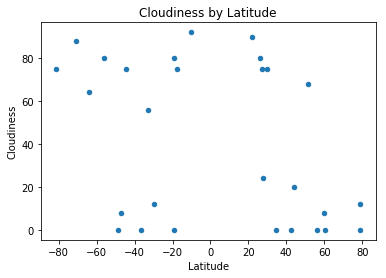

In [54]:
owm_df.plot(kind = 'scatter', x = 'Latitude', y = 'Cloudiness')
plt.title('Cloudiness by Latitude')

Text(0.5,1,'Humidity (%) by Latitude')

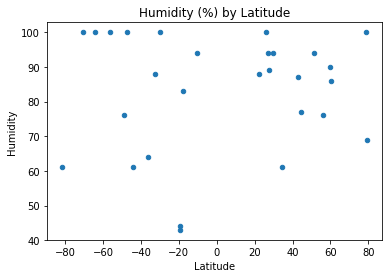

In [55]:
owm_df.plot(kind = 'scatter', x = 'Latitude', y = 'Humidity')
plt.title('Humidity (%) by Latitude')

Text(0.5,1,'Wind Speed by Latitude')

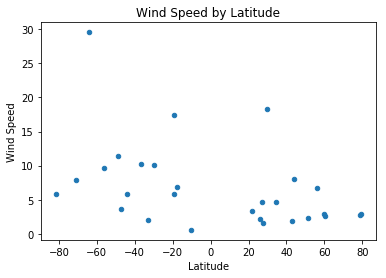

In [56]:
owm_df.plot(kind = 'scatter', x = 'Latitude', y = 'Wind Speed')
plt.title('Wind Speed by Latitude')

Text(0.5,1,'Max Temp by Latitude')

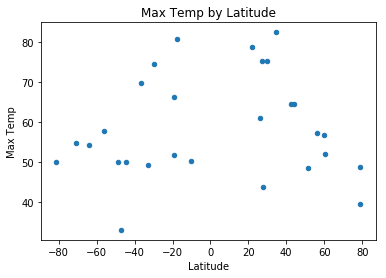

In [57]:
owm_df.plot(kind = 'scatter', x = 'Latitude', y = 'Max Temp')
plt.title('Max Temp by Latitude')